Comparing Plano's population to Plano presidential election voting behaviors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [2]:
# Manipulate population data to just 2000-2020 and make the years the indices
def cleanPlanoPopulationData():
    plano_population_df = pd.read_csv('plano-population-data.csv')
    plano_population_df = plano_population_df[14:]
    plano_population_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    plano_population_df.set_index('Historical population', inplace = True)
    plano_population_df = plano_population_df.rename(columns={'Unnamed: 1': 'Population'})
    plano_population_df.drop('Unnamed: 2', axis=1, inplace=True)
    plano_population_df.drop('Unnamed: 3', axis=1, inplace=True)
    plano_population_df=plano_population_df.astype(float)

    return plano_population_df

In [29]:
clean_population_data = cleanPlanoPopulationData()
clean_population_data.head(50)

,Population
Historical population,
2000,222030.0
2010,259841.0
2020,285494.0


In [4]:
# Manipulate presidential data to just 2000, 2010, 2020 and make the years the indices
def cleanPresidentialPopulationData():
    plano_presidential_df = pd.read_csv('plano-presidential-data.csv')
    plano_presidential_df.iloc[::-1]
    plano_presidential_df.set_index('Year', inplace = True)
    plano_presidential_df=plano_presidential_df.astype(float)
    return plano_presidential_df


In [22]:
clean_presidential_data = cleanPresidentialPopulationData()
clean_presidential_data.head(50)

,Democratic,Republican,Third Parties
Year,,,
2020,72736.0,60840.0,2389.0
2016,49522.0,54784.0,4988.0
2012,37435.0,60733.0,1817.0
2008,42441.0,63193.0,1280.0
2004,30387.0,66562.0,852.0
2000,20888.0,58447.0,2093.0


In [103]:
def merge_population_and_presidential(population_data, presidential_data):
    population_data.index = population_data.index.map(int)
    merged = pd.concat([presidential_data, population_data], axis=1)
    merged = merged.interpolate(method ='linear')
    merged = merged.sort_index(axis = 0)
    
    return merged
    

In [104]:
merged = merge_population_and_presidential(clean_population_data, clean_presidential_data)
merged.head(50)


,Democratic,Republican,Third Parties,Population
2000,20888.0,58447.0,2093.0,222030.0
2004,30387.0,66562.0,852.0,234722.8
2008,42441.0,63193.0,1280.0,247415.6
2010,20888.0,58447.0,2093.0,259841.0
2012,37435.0,60733.0,1817.0,260108.4
2016,49522.0,54784.0,4988.0,272801.2
2020,72736.0,60840.0,2389.0,285494.0


In [119]:
 def plot_population_and_presidential_data(merged_data):
    merged_plot = merged_data.plot(title='Plano Population vs. Presidential Voting Habits')
    merged_plot.set_xlabel("Year")
    merged_plot.set_ylabel("Population")


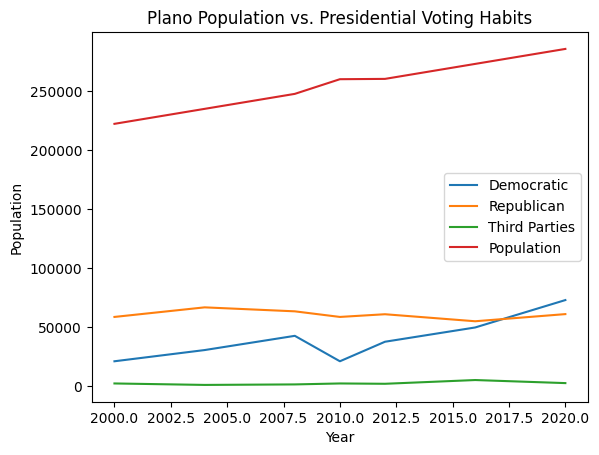

In [120]:
plot_population_and_presidential_data(merged)